# Exploratory data analysis

Zuzanna Gorczyca, zgo@kth.se

Alga Nour Elimane, nealga@kth.se

Tse An Shih, tashih@kth.se

#### Imports

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Load data

In [108]:
dir_path = os.getcwd()
train_path = os.path.join(dir_path, "training_smiles.csv")
test_path = os.path.join(dir_path, "test_smiles.csv")

train_data = pd.read_csv(train_path, index_col="INDEX")
test_data = pd.read_csv(test_path, index_col="INDEX")

## EDA

Find shape of data

In [109]:
train_data.shape

(202895, 2)

In training data we have 202,895 samples with 3 features.
One is index, and one is label.

Columns names

In [110]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202895 entries, 1 to 202895
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   SMILES  202895 non-null  object 
 1   ACTIVE  202895 non-null  float64
dtypes: float64(1), object(1)
memory usage: 4.6+ MB


Non coulms with missing data or non-value colums.

Print firsts rows of dataset

In [111]:
train_data.head(10)

,SMILES,ACTIVE
INDEX,,
1,O=C(Nc1ccc2c(c1)OCCO2)C1CCN(c2ncccn2)CC1,0.0
2,COCCCN1C(=O)C2C(C(=O)Nc3cccc(Cl)c3)C3C=CC2(O3)...,0.0
3,CCSc1ncc(Cl)c(C(=O)Nc2ccccc2C)n1,0.0
4,COc1ccc2cc(/C=N/NC(=O)CN(c3ccccc3C)S(=O)(=O)c3...,0.0
5,CCCC(=O)Nc1nc2ccc(NC(=O)c3c(F)c(F)c(OC)c(F)c3F...,0.0
6,O=C(Cn1ccc([N+](=O)[O-])n1)NCc1nc2ccccc2[nH]1,0.0
7,Cc1ccc(OCC(=O)N/N=C\c2ccc(-c3cccc(C(=O)O)c3)o2...,0.0
8,COc1ccc(-n2c(SCC3CNC(=O)O3)nnc2-c2ccc(Cl)cc2)cc1,0.0
9,Cc1ccc(S(=O)(=O)NCCCN(C)C)cc1,0.0


In [112]:
train_data.tail(10)

,SMILES,ACTIVE
INDEX,,
202886,O=C(Nc1nc2c(Cl)cccc2s1)C1CC1,0.0
202887,O=[P+](Cc1ccccc1)Cc1ccccc1,0.0
202888,Cc1ccc2c(c1)sc1ncc(NC(=O)c3ccc(F)cc3)c(=O)n12,0.0
202889,CCC(=O)Nc1cccc2c1C(=O)N(C)C2=O,0.0
202890,Nc1[nH]c(SCC(=O)N2CCOCC2)nc(=O)c1-c1ccccc1,0.0
202891,O=S1(=O)CC2(N3CCOCC3)CCCCCCC21,0.0
202892,Cc1ccc(C2c3c(oc4ccccc4c3=O)C(=O)N2c2nnc(C(C)C)...,0.0
202893,COc1ccc(CC(=O)OCC(=O)NCc2ccc(Cl)cc2)cc1,0.0
202894,CC1CN(CCOCCOc2ccccc2-c2ccccc2)CC(C)O1,0.0


Labels

In [113]:
train_data["ACTIVE"].unique()

array([0., 1.])

Describing labels ACTIVE column od dataset. We can see that dataset is clearly unbalanced there is much more values 0.0 then 1.0.

In [114]:
train_data["ACTIVE"].describe()

count    202895.000000
mean          0.061677
std           0.240569
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: ACTIVE, dtype: float64

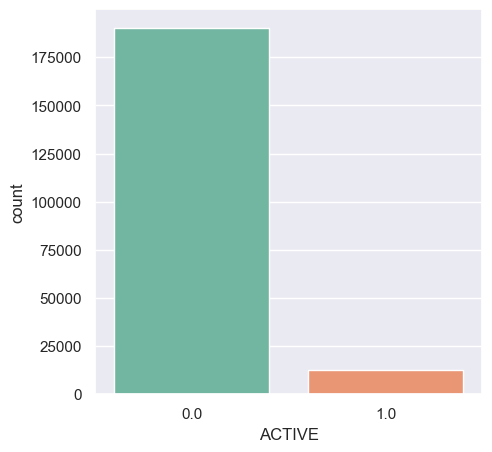

In [117]:
plt.figure(figsize=(5,5))
sns.set(style="darkgrid")
ax = sns.countplot(x="ACTIVE", data=train_data, palette="Set2", order=train_data['ACTIVE'].value_counts().index[0:15])
plt.show()

In [118]:
train_data["SMILES"].unique()

array(['O=C(Nc1ccc2c(c1)OCCO2)C1CCN(c2ncccn2)CC1',
       'COCCCN1C(=O)C2C(C(=O)Nc3cccc(Cl)c3)C3C=CC2(O3)C1C(=O)NC1CCCCC1',
       'CCSc1ncc(Cl)c(C(=O)Nc2ccccc2C)n1', ...,
       'COc1ccc(CC(=O)OCC(=O)NCc2ccc(Cl)cc2)cc1',
       'CC1CN(CCOCCOc2ccccc2-c2ccccc2)CC(C)O1',
       'CC(=O)N1CCN(Cc2nc3ccc(Cl)cc3n2CCO)CC1'],
      shape=(202664,), dtype=object)

Column SMILES has 202664 uniques values. So there is 231 identical values. Its important to check if they have same label.

93518 False True
115550 False True
120558 False True
122241 False True
136679 False True
154304 False True
161900 False True
168042 False True

In [120]:
duplicated_rows1 = train_data.duplicated(subset="SMILES", keep='first')
duplicated_rows2 = train_data.duplicated(subset="SMILES", keep='last')
for idx in duplicated_rows1.index:
    if duplicated_rows2[idx] != duplicated_rows1[idx]:
        duplicated_rows1[idx] = True
duplicates = train_data[duplicated_rows1].sort_values(by="SMILES")

conflicting_smiles = duplicates.groupby('SMILES').filter(lambda x: x['ACTIVE'].nunique() > 1)
display(conflicting_smiles)

train_data_new = train_data.drop(conflicting_smiles.index)
print(f"Removed {len(conflicting_smiles)} conflicting rows")
print(f"New training data shape: {train_data_new.shape}")

,SMILES,ACTIVE
INDEX,,
115551,CC(C)[C@@]1(NC(=O)[C@@H]2C[C@@H]3c4cccc5[nH]cc...,0.0
10066,CC(C)[C@@]1(NC(=O)[C@@H]2C[C@@H]3c4cccc5[nH]cc...,1.0
122242,CC[C@@H](CO)NC(=O)[C@@H]1C=C2c3cccc4c3c(cn4C)C...,1.0
38930,CC[C@@H](CO)NC(=O)[C@@H]1C=C2c3cccc4c3c(cn4C)C...,0.0
162809,CC[C@@H](CO)NC(=O)[C@@H]1C=C2c3cccc4c3c(cn4C)C...,0.0
137637,CN1CCCN(C(c2ccccc2)c2ccc(Cl)cc2)CC1,0.0
154305,CN1CCCN(C(c2ccccc2)c2ccc(Cl)cc2)CC1,1.0
84366,COc1ccccc1OCCNCC(O)COc1cccc2[nH]c3ccccc3c12,1.0
93519,COc1ccccc1OCCNCC(O)COc1cccc2[nH]c3ccccc3c12,0.0


Removed 17 conflicting rows
New training data shape: (202878, 2)


In [125]:
from ydata_profiling import ProfileReport
prof = ProfileReport(train_data)
prof.to_file(output_file='eda_train1.html')
prof

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 323.48it/s]
